# FOOD NUTRITION

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_food = pd.read_csv("ABBREV.csv")

In [12]:
data_food

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


### ¿Posee clase el data set?

Podemos observar que el dataset no posee una clase

### A. Percentiles Y Cuartiles

In [13]:
def calcular_percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    N = len(datos)
    
    posicion = (percentil / 100) * (N + 1)
    
    # Si la posición es un número entero, devolver el valor en esa posición
    if posicion.is_integer():
        return datos_ordenados[int(posicion) - 1]
    
    # Si no es un número entero, interpolar entre los dos valores más cercanos
    pos_superior = int(posicion)
    pos_inferior = int(posicion) - 1
    peso = posicion - int(posicion)
    
    # Interpolación entre el valor inferior y superior
    return datos_ordenados[pos_inferior] + peso * (datos_ordenados[pos_superior] - datos_ordenados[pos_inferior])

In [14]:
def calcular_cuartiles(datos):
    # Primer cuartil (Q1, 25%), mediana (Q2, 50%), tercer cuartil (Q3, 75%)
    q1 = calcular_percentil(datos, 25)
    q2 = calcular_percentil(datos, 50)  # Esto es la mediana
    q3 = calcular_percentil(datos, 75)
    
    return q1, q2, q3

In [15]:
def calcular_percentiles_y_cuartiles(df):
    resultados = {}
    for columna in df.columns:
        # Verificar si la columna es cualitativa (categórica)
        if df[columna].dtype == 'object' or df[columna].dtype.name == 'category':
            resultados[columna] = {
                'Nota': 'Esta columna es cualitativa; no se pueden calcular percentiles ni cuartiles.'
            }
            continue
        # Convertir la columna a lista y eliminar NaN
        datos = df[columna].dropna().tolist()
        
        # Calcular cuartiles
        q1, q2, q3 = calcular_cuartiles(datos)
        
        # Almacenar resultados
        resultados[columna] = {
            'Percentil 1': calcular_percentil(datos, 1),
            'Percentil 25 (Q1)': q1,
            'Mediana (Q2)': q2,
            'Percentil 75 (Q3)': q3,
            'Percentil 99': calcular_percentil(datos, 99)
        }
    
    return resultados


In [16]:
# Calcular percentiles y cuartiles para el DataFrame
resultados = calcular_percentiles_y_cuartiles(data_food)

# Mostrar resultados
for columna, stats in resultados.items():
    print(f"{columna}:")
    for percentil, valor in stats.items():
        print(f"  {percentil}: {valor}")
    print()
    

index:
  Percentil 1: 86.91
  Percentil 25 (Q1): 2196.75
  Mediana (Q2): 4394.5
  Percentil 75 (Q3): 6592.25
  Percentil 99: 8702.09

NDB_No:
  Percentil 1: 1094.91
  Percentil 25 (Q1): 9085.75
  Mediana (Q2): 14427.5
  Percentil 75 (Q3): 20184.75
  Percentil 99: 43313.17

Shrt_Desc:
  Nota: Esta columna es cualitativa; no se pueden calcular percentiles ni cuartiles.

Water_(g):
  Percentil 1: 0.0
  Percentil 25 (Q1): 29.695
  Mediana (Q2): 63.08
  Percentil 75 (Q3): 77.965
  Percentil 99: 97.94600000000003

Energ_Kcal:
  Percentil 1: 5.0
  Percentil 25 (Q1): 91.0
  Mediana (Q2): 191.0
  Percentil 75 (Q3): 337.0
  Percentil 99: 884.0

Protein_(g):
  Percentil 1: 0.0
  Percentil 25 (Q1): 2.38
  Mediana (Q2): 8.0
  Percentil 75 (Q3): 19.884999999999998
  Percentil 99: 35.20990000000002

Lipid_Tot_(g):
  Percentil 1: 0.0
  Percentil 25 (Q1): 0.95
  Mediana (Q2): 5.140000000000001
  Percentil 75 (Q3): 13.7225
  Percentil 99: 100.0

Ash_(g):
  Percentil 1: 0.0
  Percentil 25 (Q1): 0.84
  Me

In [17]:
columns_to_plot = [
    'Energ_Kcal', 'Protein_(g)', 'Water_(g)', 'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 
    'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
    'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
    'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
    'Niacin_(mg)', 'Panto_Acid_(mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)',
    'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_(mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
    'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)', 'Beta_Crypt_(µg)',
    'Lycopene_(µg)', 'Lut+Zea_(µg)', 'Vit_E_(mg)', 'Vit_D_µg)', 'Vit_D_IU)', 'Vit_K_(µg)',
    'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_2',
    'Refuse_Pct'
]

Las distribuciones que se pueden aplicar son las siguientes, exponencial, chi-cuadrado, y tambien una bimodal

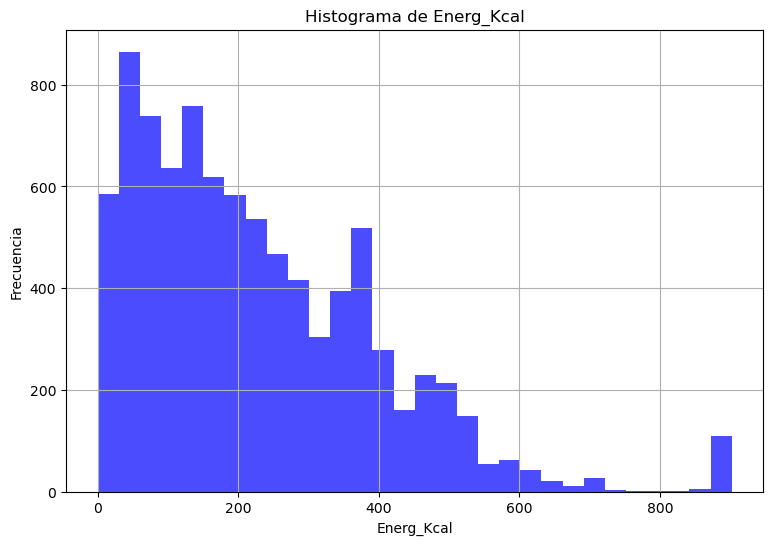

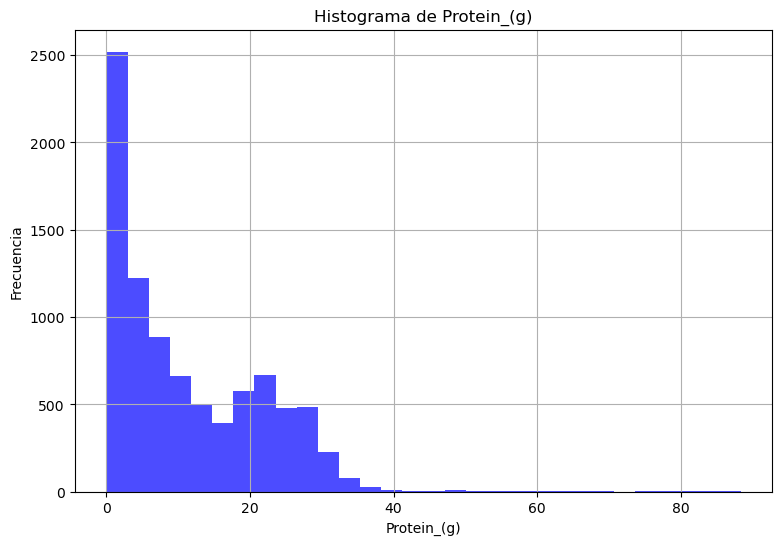

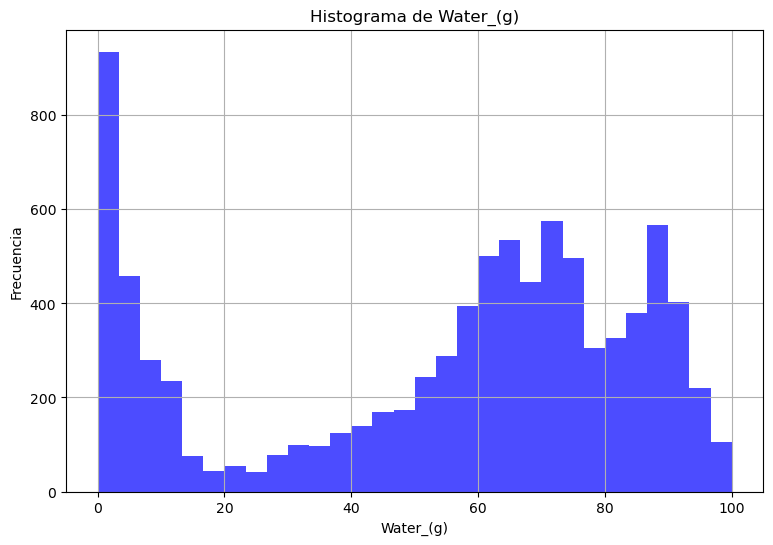

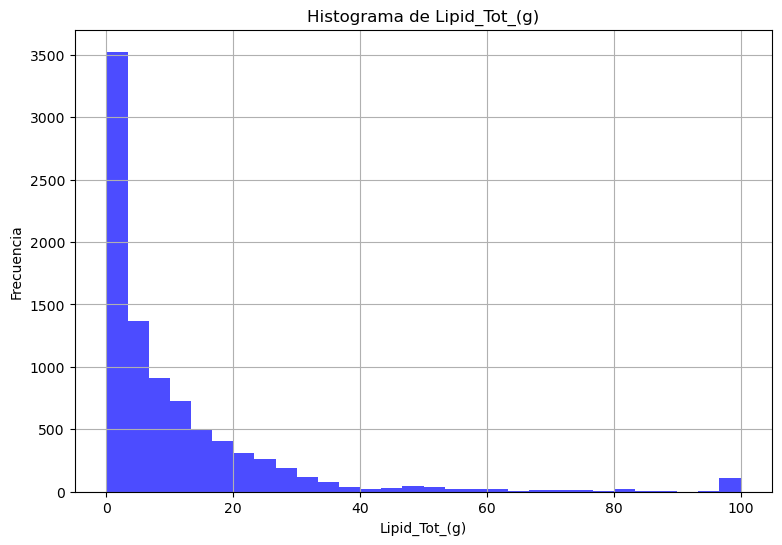

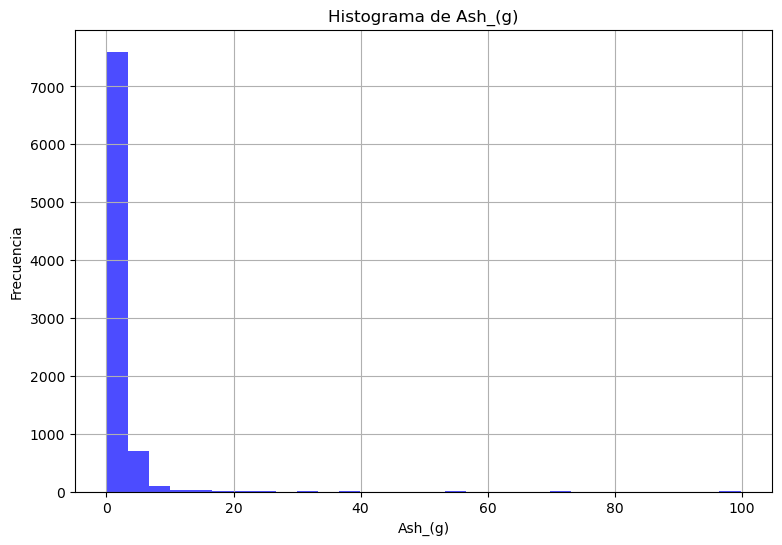

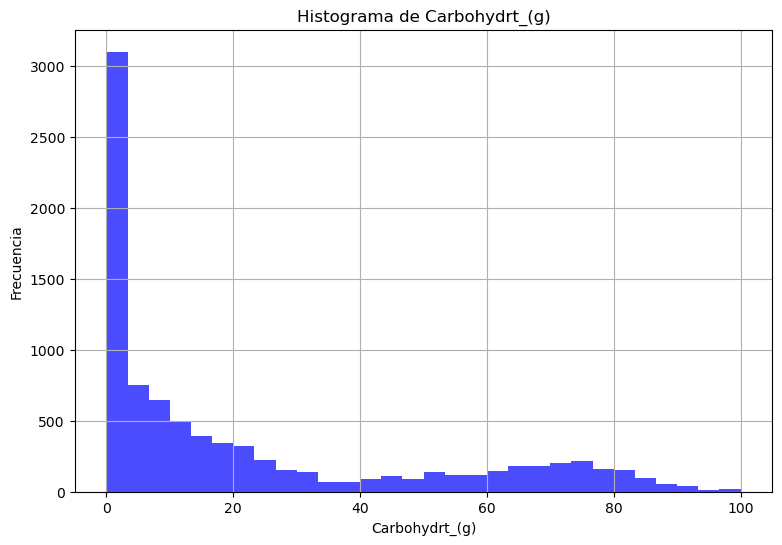

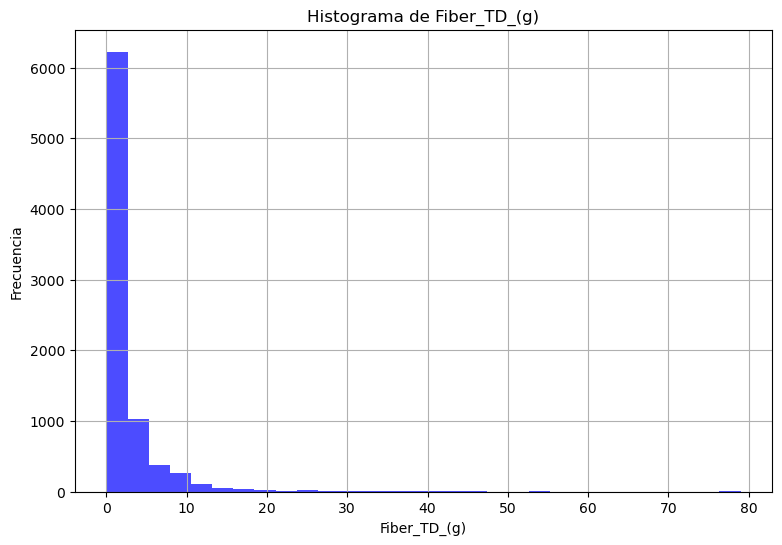

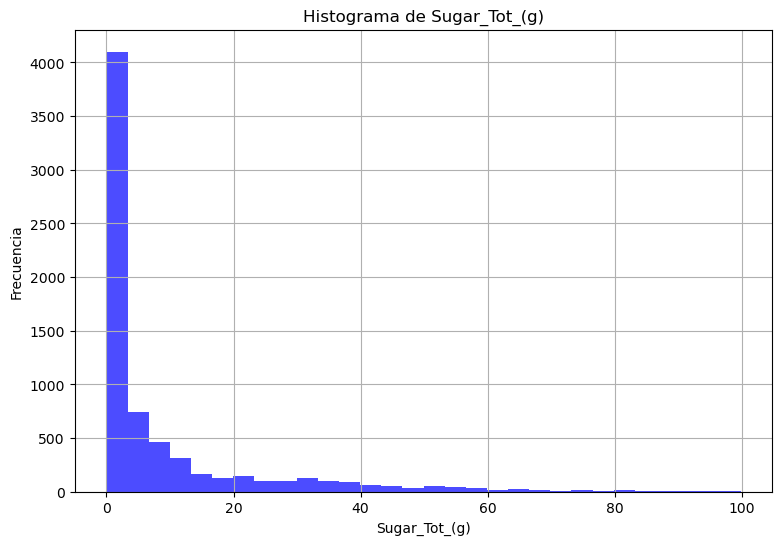

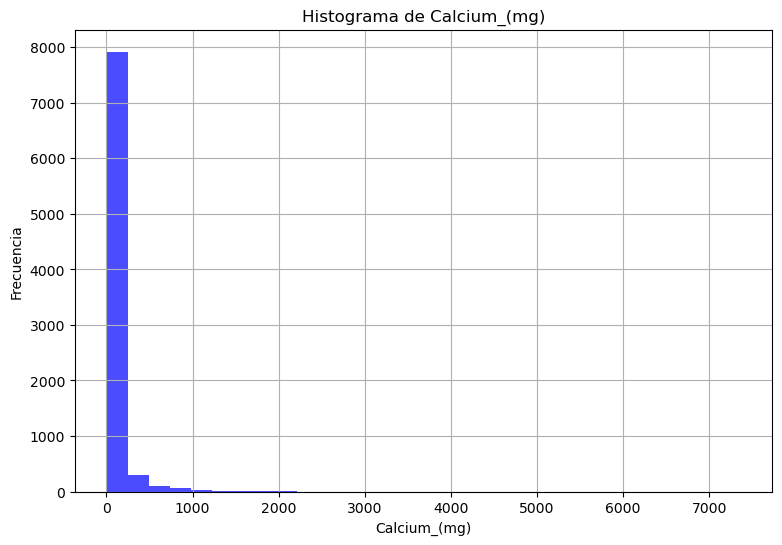

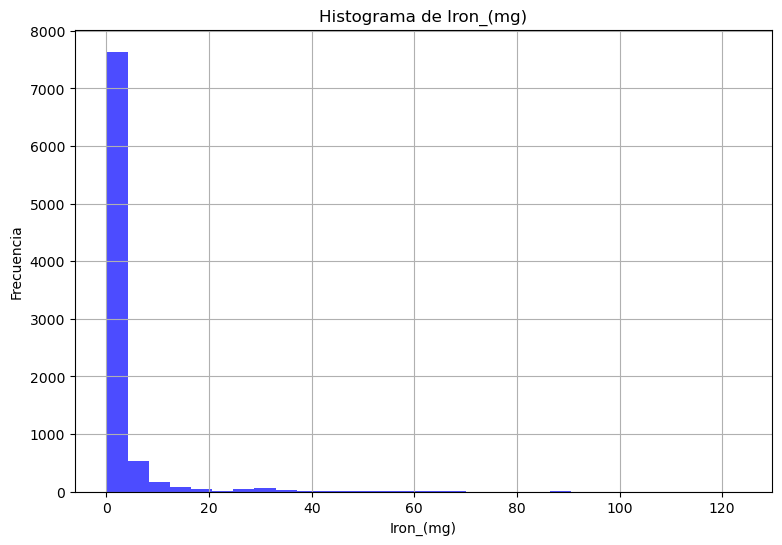

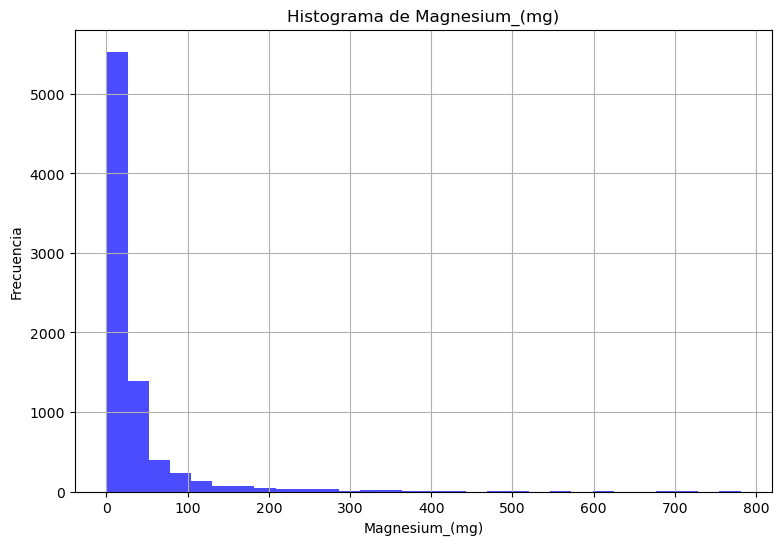

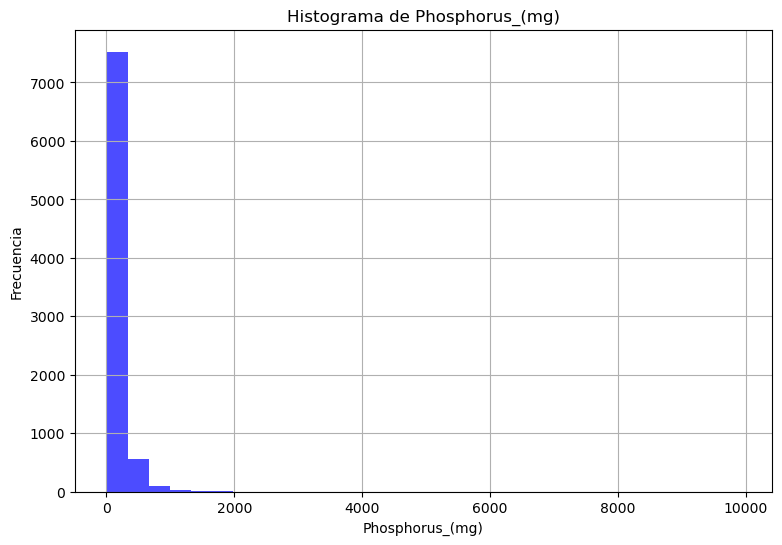

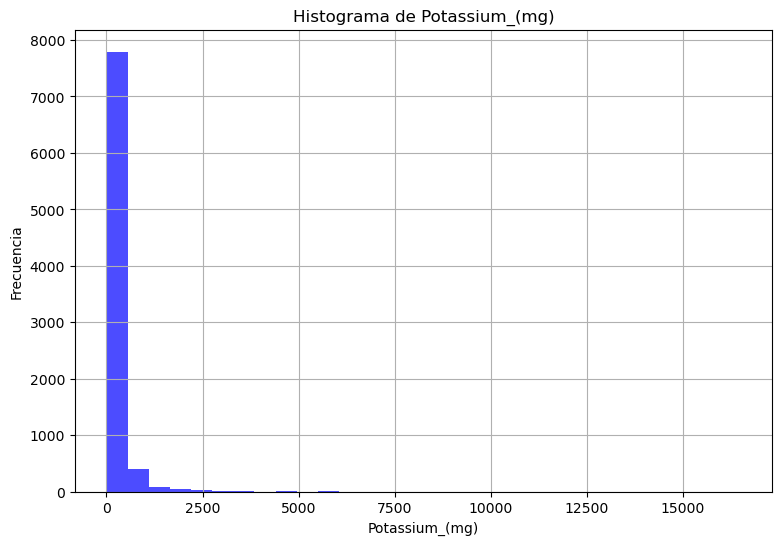

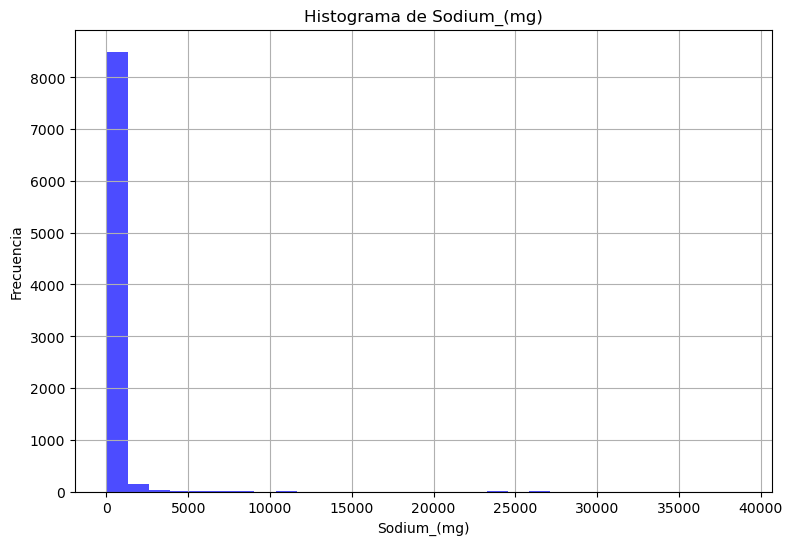

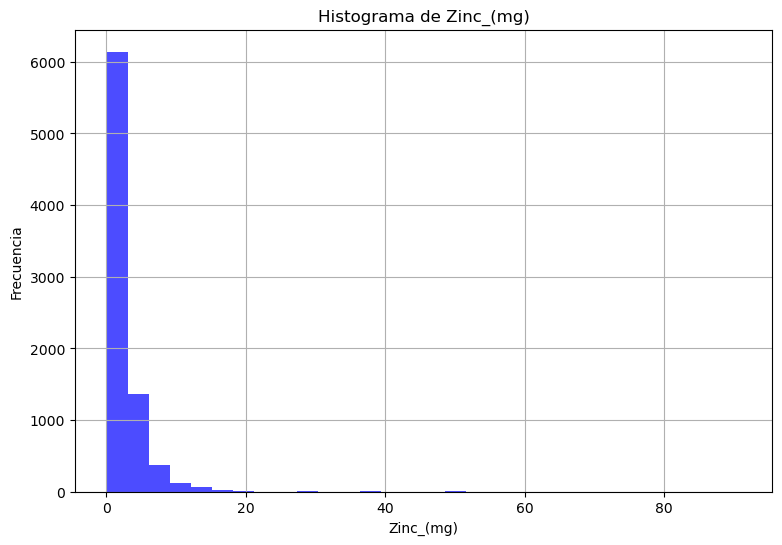

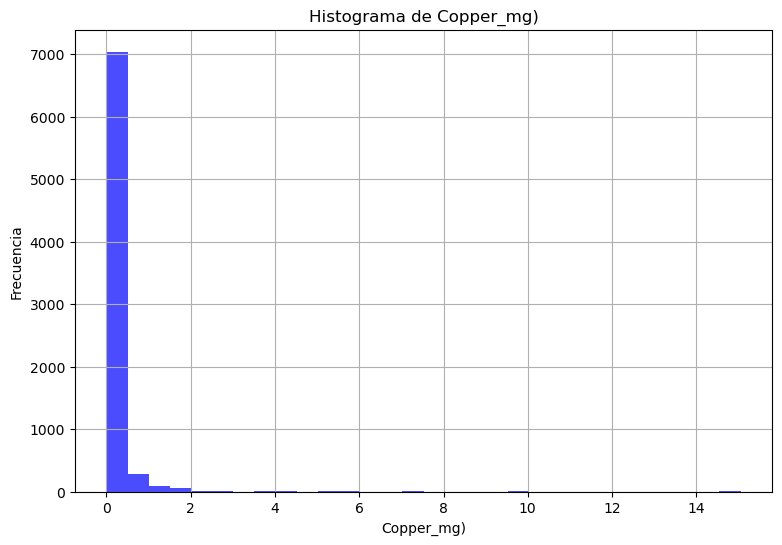

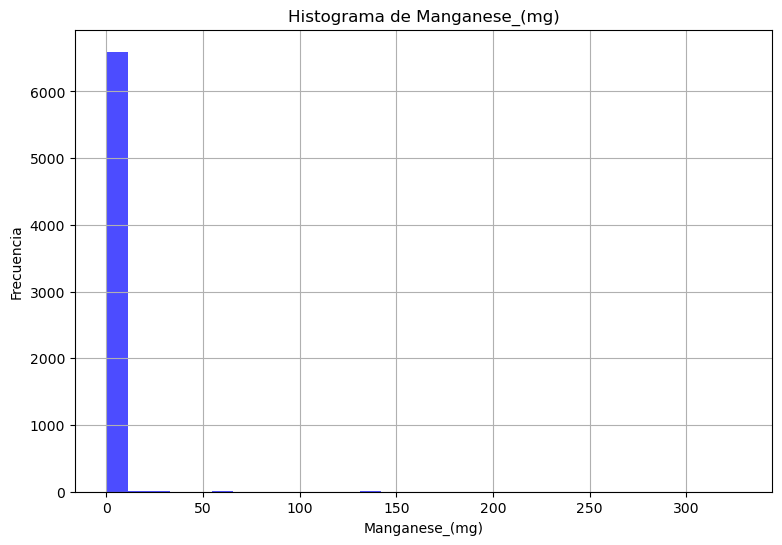

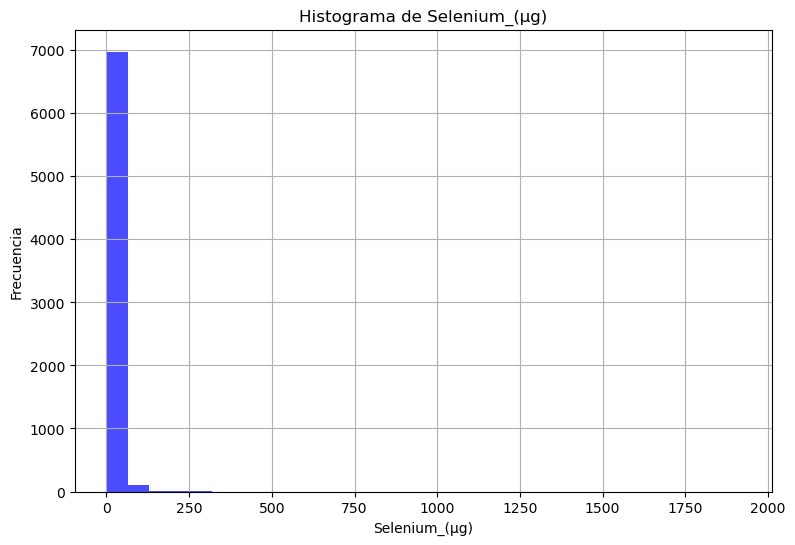

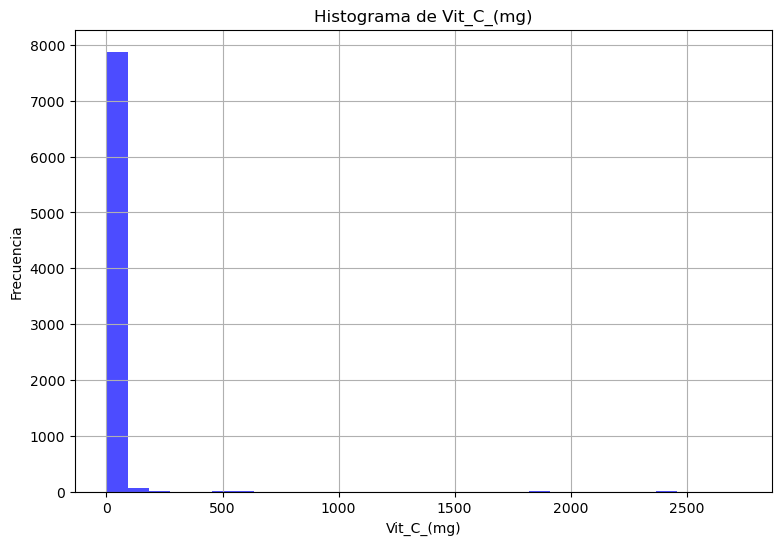

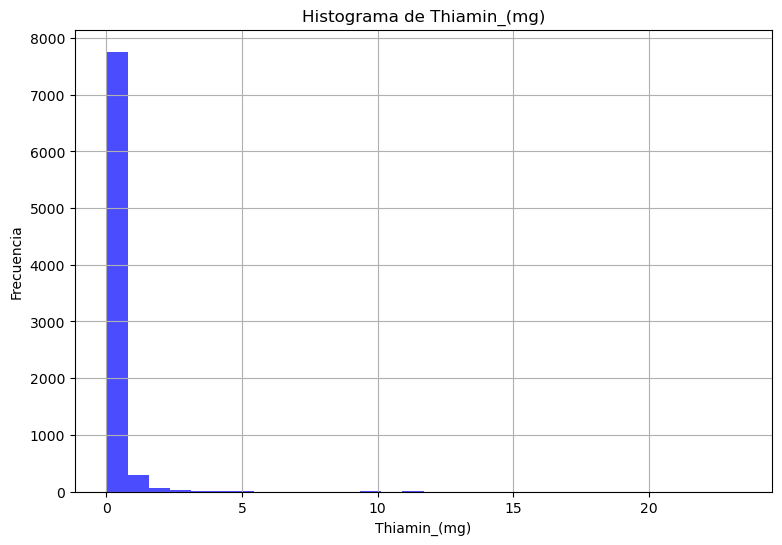

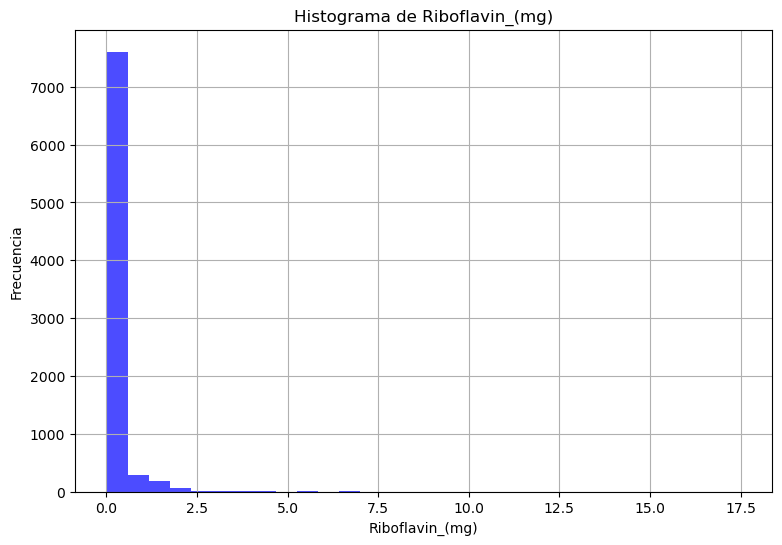

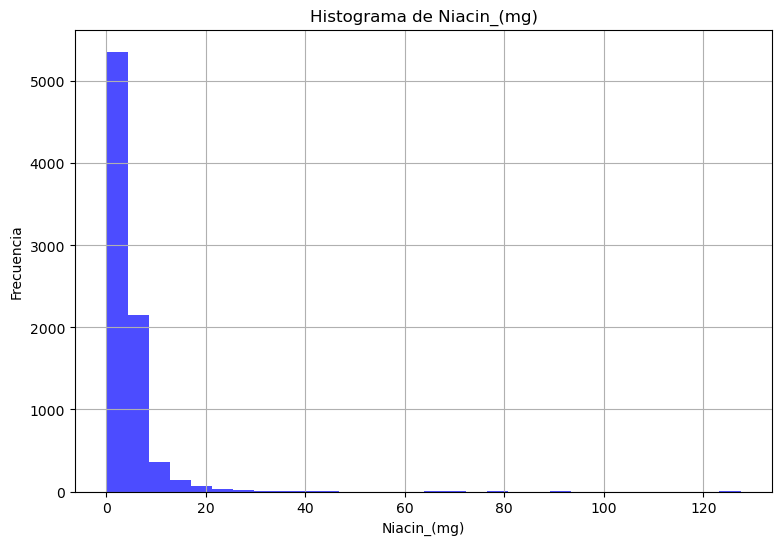

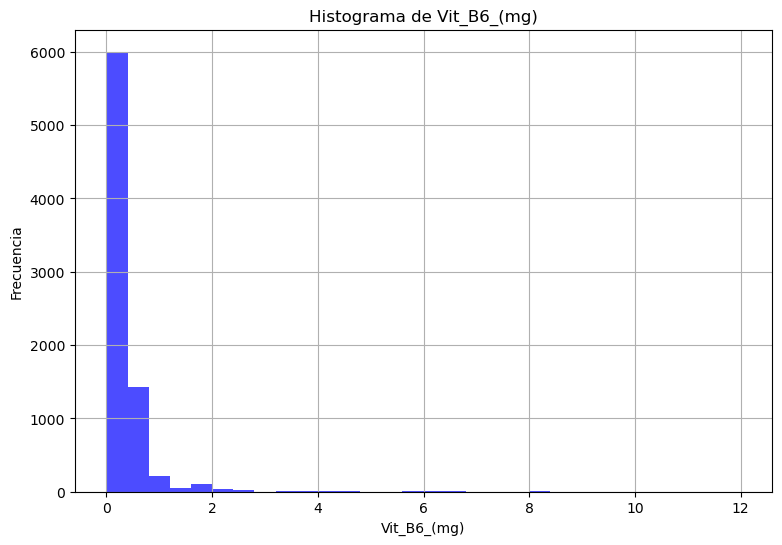

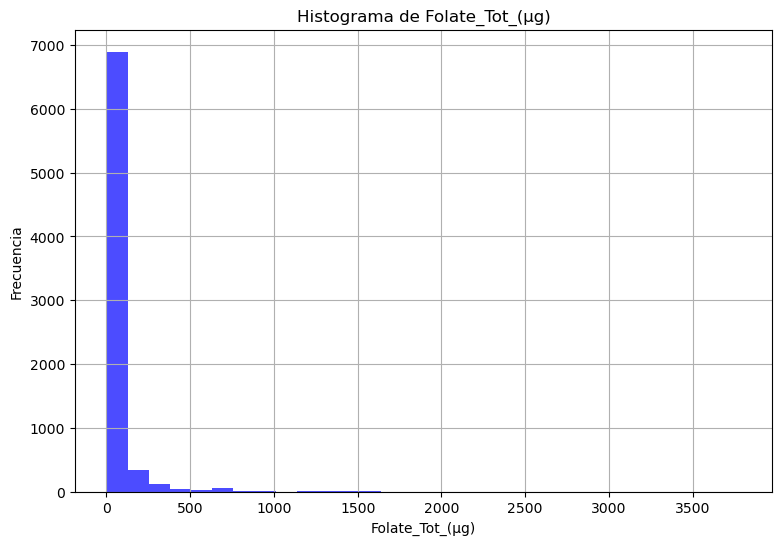

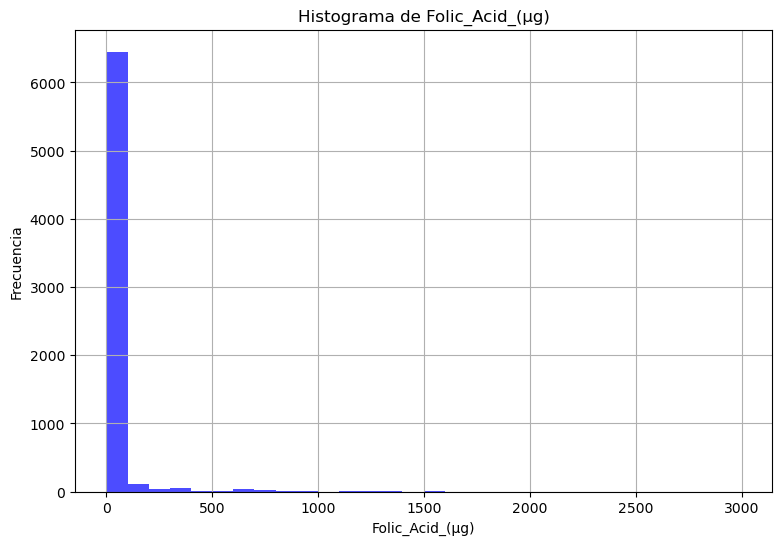

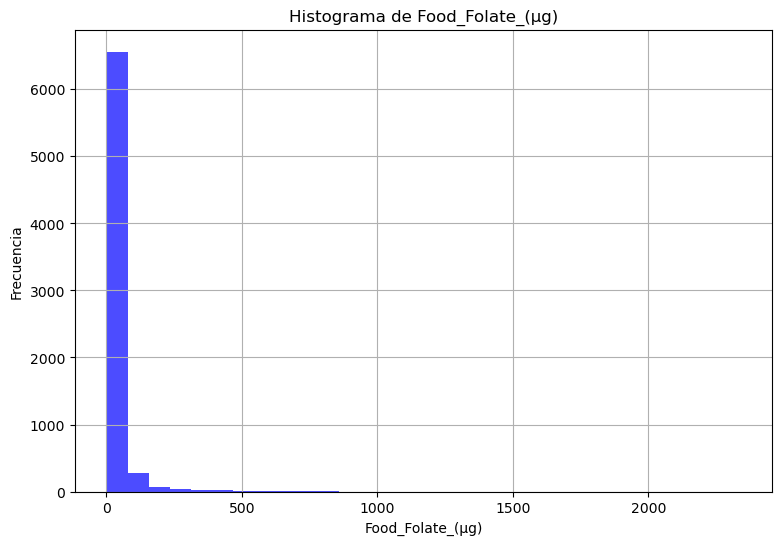

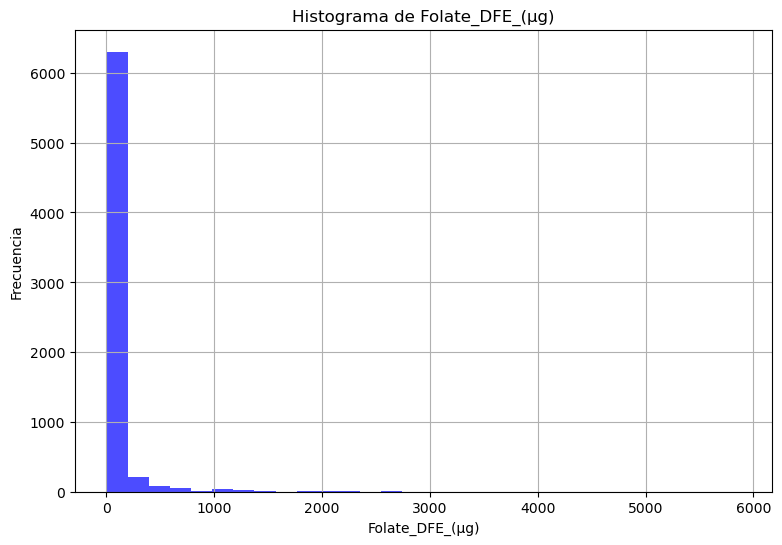

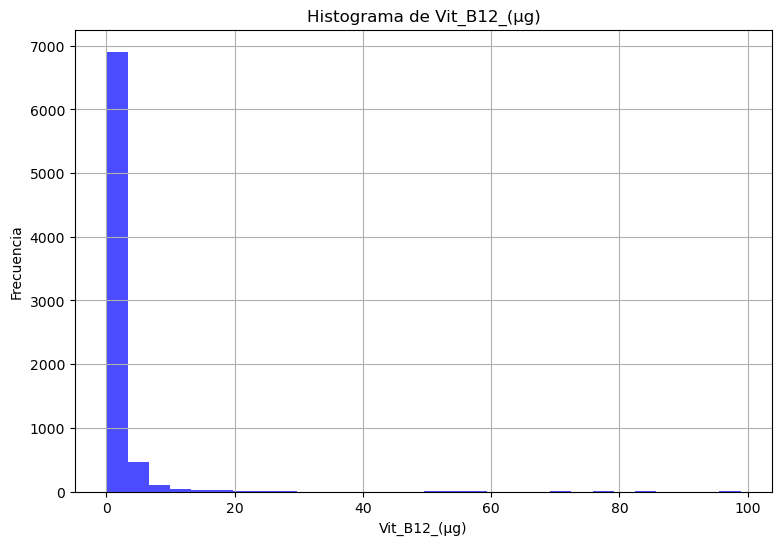

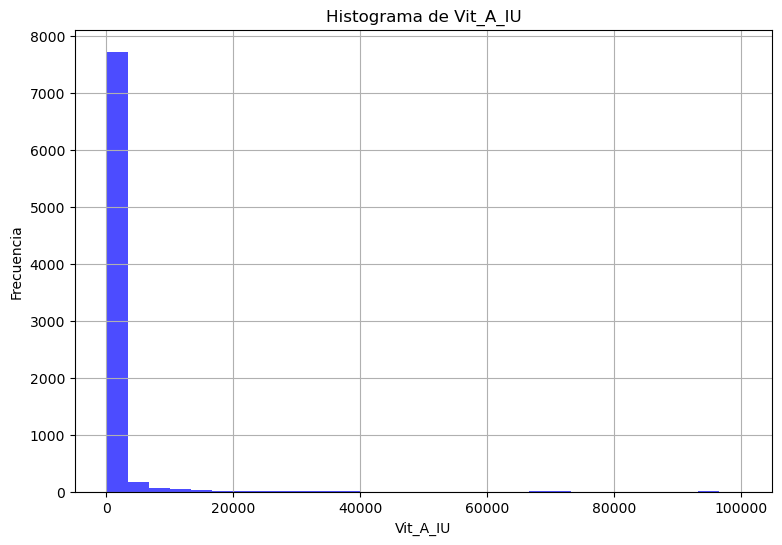

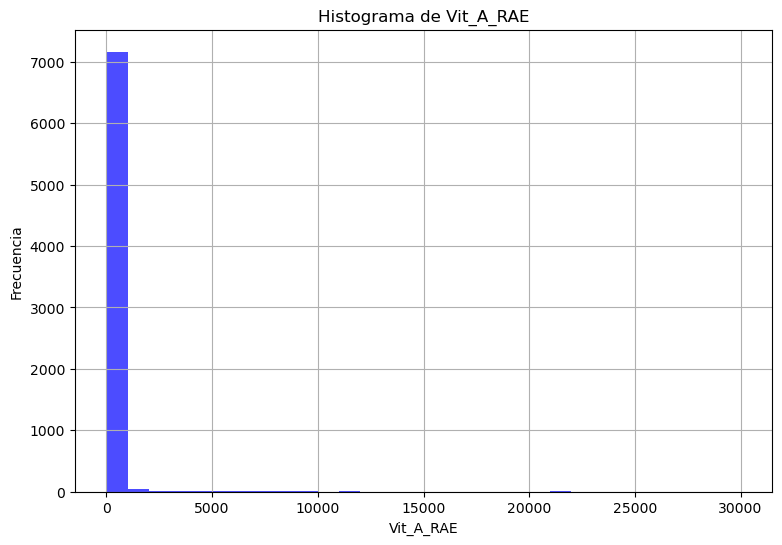

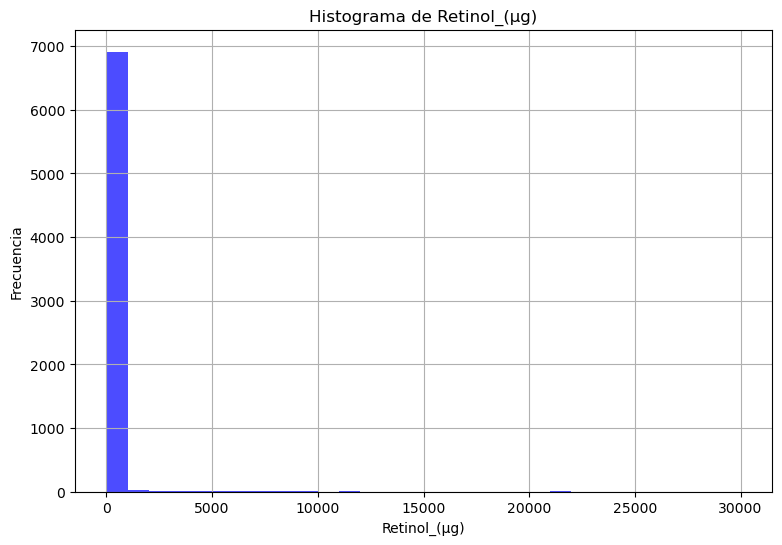

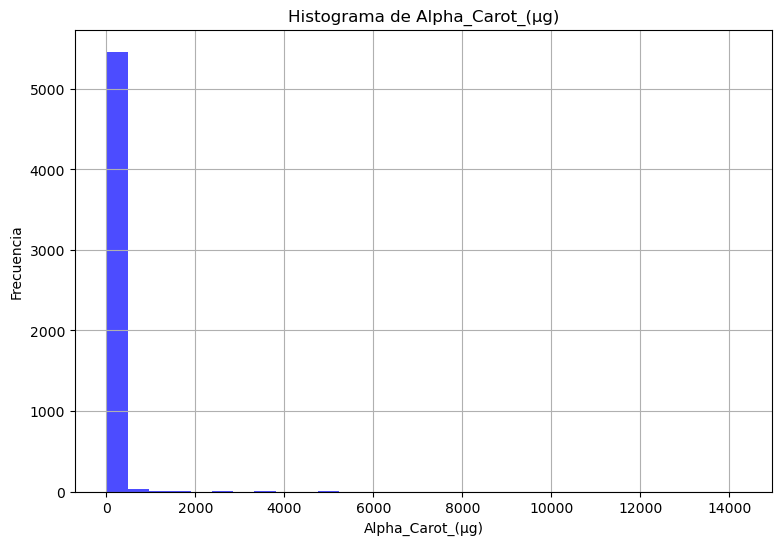

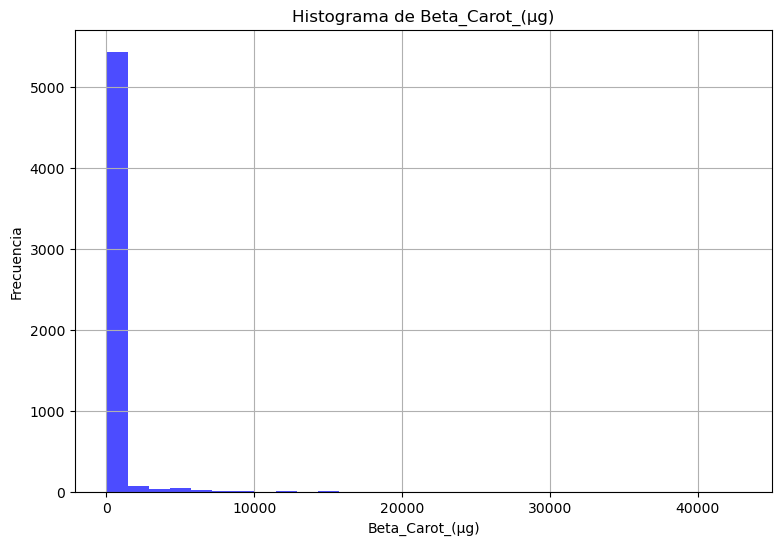

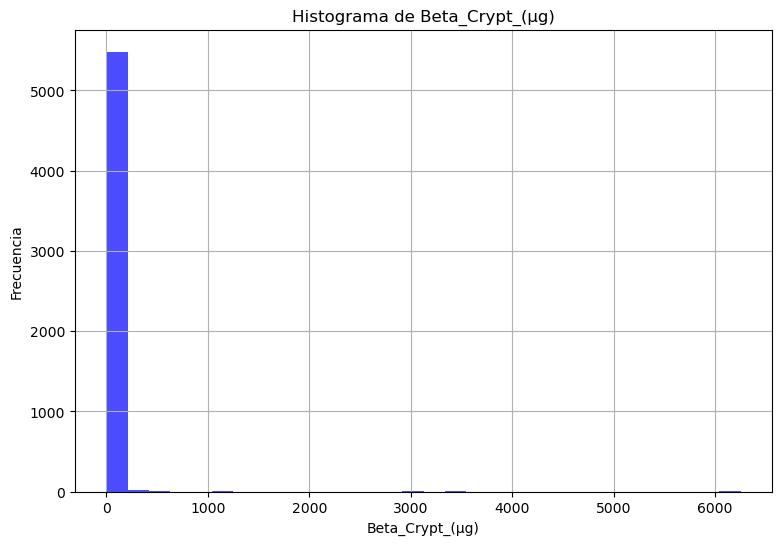

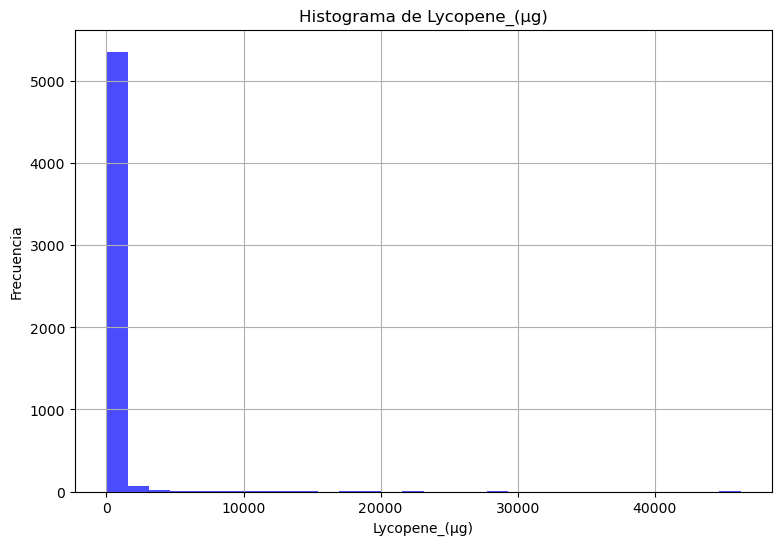

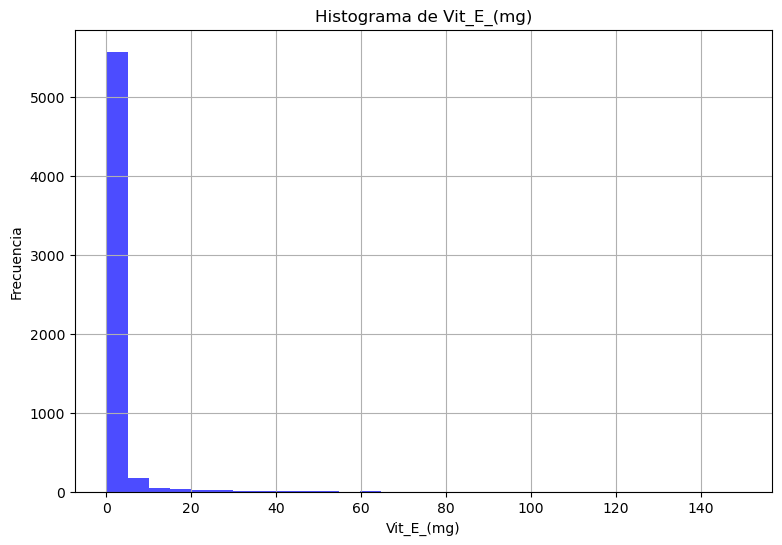

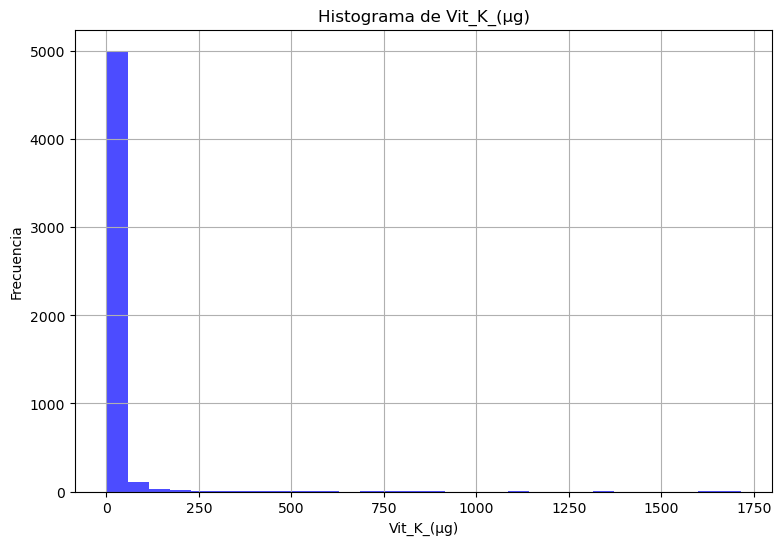

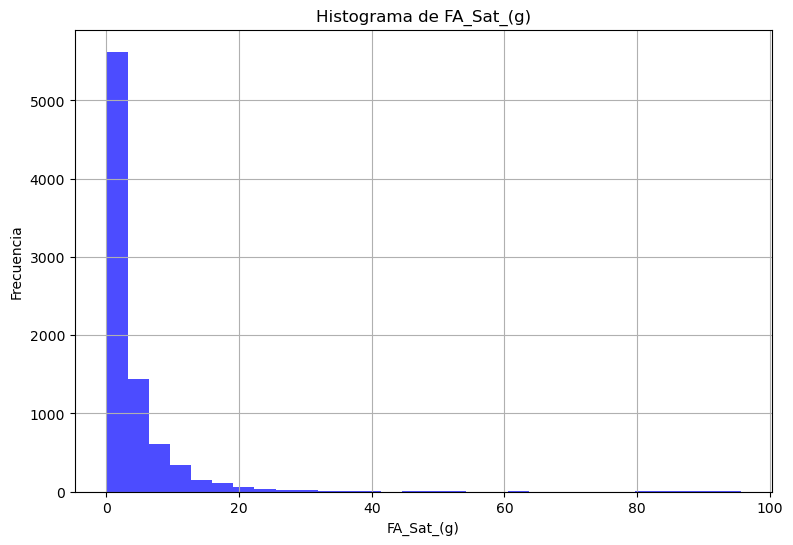

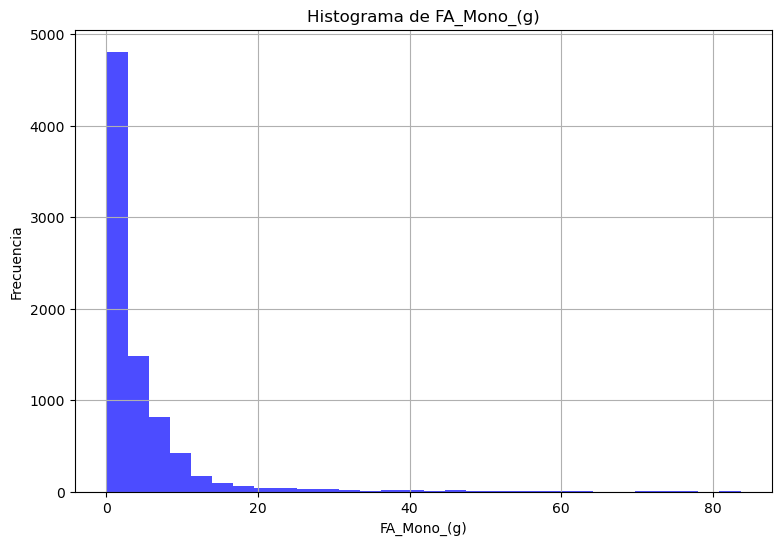

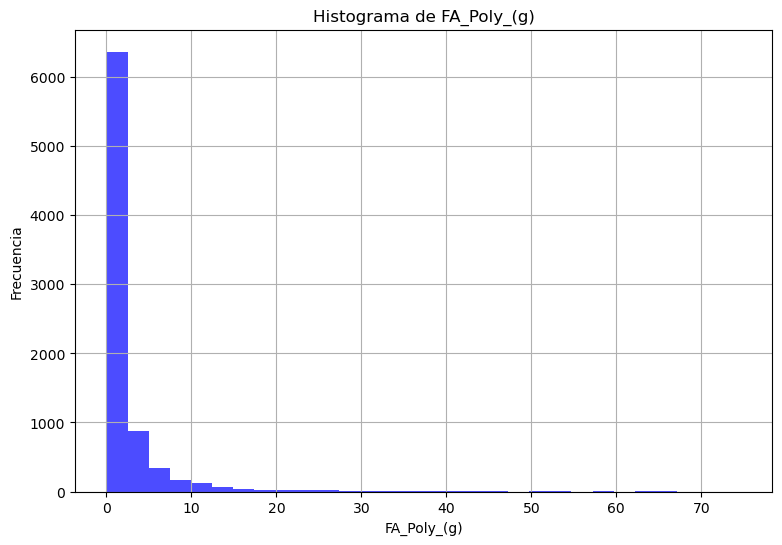

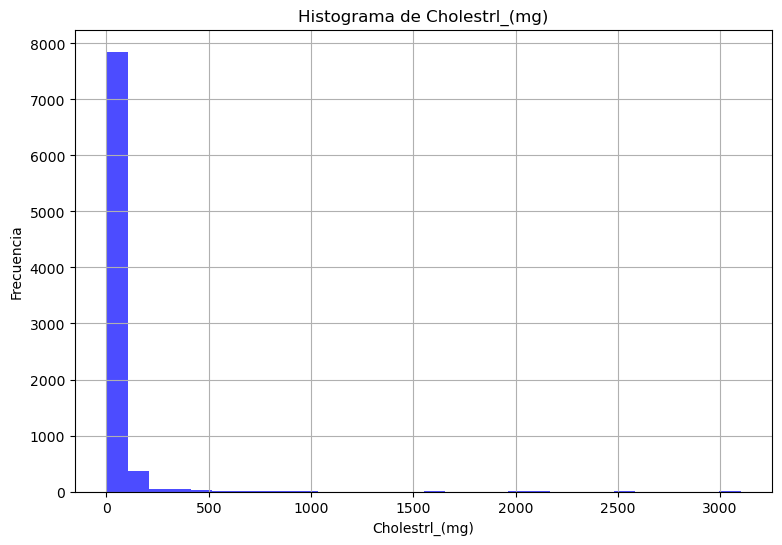

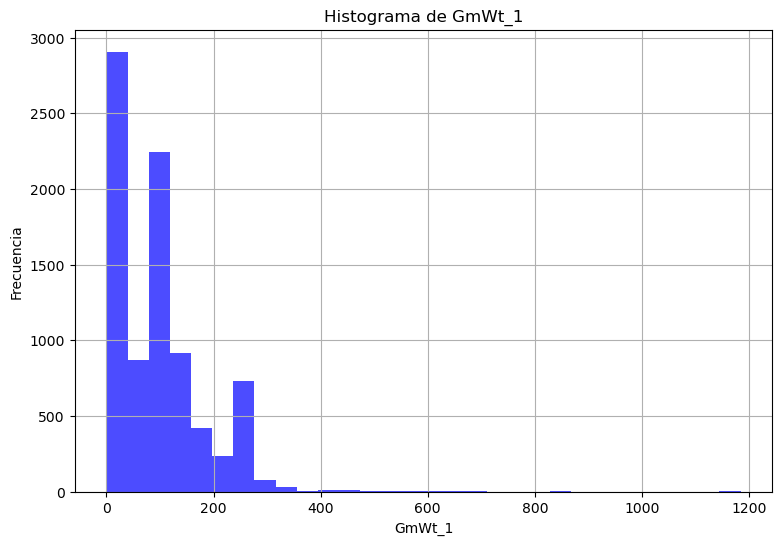

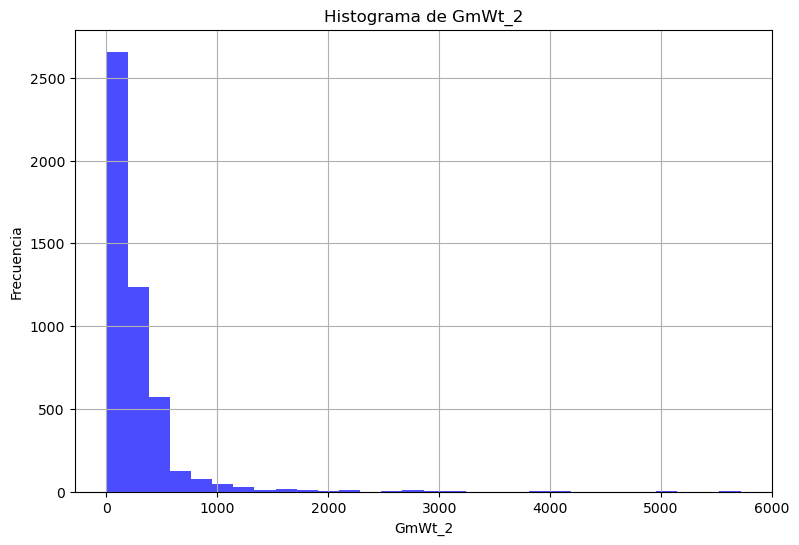

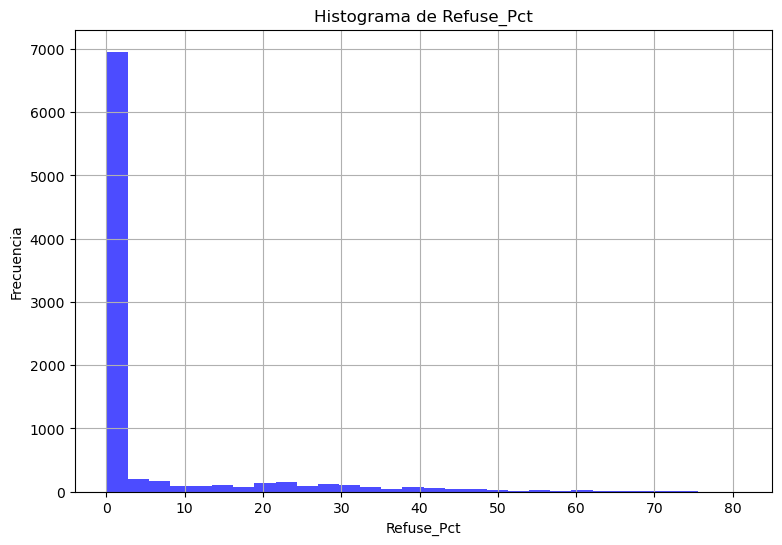

In [18]:
for column in columns_to_plot:
    if column in data_food.columns:
        plt.figure(figsize=(9, 6))
        plt.hist(data_food[column].dropna(), bins=30, alpha=0.7, color='blue')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

El dataset de Kaggle titulado **"The Nutritional Content of Food: A Comprehensive Dataset"** contiene 54 columnas que representan varias características relacionadas con el contenido nutricional de diferentes alimentos.

### Columnas:

- **index**: Identificador único para cada fila.
- **NDB_No**: Número de identificación del alimento en la base de datos NDB (National Nutrient Database de USDA).
- **Shrt_Desc**: Descripción corta del alimento.
- **Water_(g)**: Cantidad de agua presente en gramos por cada 100 g del alimento.
- **Energ_Kcal**: Energía en calorías por cada 100 g del alimento.
- **Protein_(g)**: Cantidad de proteína en gramos por cada 100 g.
- **Lipid_Tot_(g)**: Total de lípidos (grasas) en gramos.
- **Ash_(g)**: Ceniza, que representa los minerales inorgánicos presentes.
- **Carbohydrt_(g)**: Carbohidratos en gramos por cada 100 g.
- **Fiber_TD_(g)**: Fibra dietética total en gramos.
- **Sugar_Tot_(g)**: Azúcar total en gramos.
- **Calcium_(mg)**: Calcio en miligramos.
- **Iron_(mg)**: Hierro en miligramos.
- **Magnesium_(mg)**: Magnesio en miligramos.
- **Phosphorus_(mg)**: Fósforo en miligramos.
- **Potassium_(mg)**: Potasio en miligramos.
- **Sodium_(mg)**: Sodio en miligramos.
- **Zinc_(mg)**: Zinc en miligramos.
- **Copper_(mg)**: Cobre en miligramos (la columna parece estar mal etiquetada como *Copper_mg*).
- **Manganese_(mg)**: Manganeso en miligramos.
- **Selenium_(µg)**: Selenio en microgramos.
- **Vit_C_(mg)**: Vitamina C en miligramos.
- **Thiamin_(mg)**: Tiamina (Vitamina B1) en miligramos.
- **Riboflavin_(mg)**: Riboflavina (Vitamina B2) en miligramos.
- **Niacin_(mg)**: Niacina (Vitamina B3) en miligramos.
- **Panto_Acid_(mg)**: Ácido pantoténico en miligramos (parece haber un error en el nombre de la columna).
- **Vit_B6_(mg)**: Vitamina B6 en miligramos.
- **Folate_Tot_(µg)**: Folato total en microgramos.
- **Folic_Acid_(µg)**: Ácido fólico en microgramos.
- **Food_Folate_(µg)**: Folato de los alimentos en microgramos.
- **Folate_DFE_(µg)**: Equivalentes dietéticos de folato en microgramos.
- **Choline_Tot_(mg)**: Colina total en miligramos.
- **Vit_B12_(µg)**: Vitamina B12 en microgramos.
- **Vit_A_IU**: Vitamina A en unidades internacionales (IU).
- **Vit_A_RAE**: Vitamina A en equivalentes de actividad de retinol (RAE).
- **Retinol_(µg)**: Retinol en microgramos.
- **Alpha_Carot_(µg)**: Alfa-caroteno en microgramos.
- **Beta_Carot_(µg)**: Beta-caroteno en microgramos.
- **Beta_Crypt_(µg)**: Beta-criptoxantina en microgramos.
- **Lycopene_(µg)**: Licopeno en microgramos.
- **Lut+Zea_(µg)**: Luteína y zeaxantina en microgramos.
- **Vit_E_(mg)**: Vitamina E en miligramos.
- **Vit_D_(µg)**: Vitamina D en microgramos.
- **Vit_D_IU**: Vitamina D en unidades internacionales (IU).
- **Vit_K_(µg)**: Vitamina K en microgramos.
- **FA_Sat_(g)**: Ácidos grasos saturados en gramos.
- **FA_Mono_(g)**: Ácidos grasos monoinsaturados en gramos.
- **FA_Poly_(g)**: Ácidos grasos poliinsaturados en gramos.
- **Cholestrl_(mg)**: Colesterol en miligramos.
- **GmWt_1**: Peso en gramos para la primera porción estándar.
- **GmWt_Desc1**: Descripción de la primera porción estándar.
- **GmWt_2**: Peso en gramos para la segunda porción estándar.
- **GmWt_Desc2**: Descripción de la segunda porción estándar.
- **Refuse_Pct**: Porcentaje de la parte no consumible del alimento.